In [1]:
from collections import Counter
from dataclasses import dataclass
import random
from typing import List, Dict, Tuple

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

GLOBAL_SEED = 42  # number of life
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)

## Tiền xử lý dữ liệu

In [2]:
order_df = pd.read_csv("./data/order_products__train.csv")
order_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [3]:
def get_list_orders(order_df: pd.DataFrame) -> List[List[int]]:
    order_df = order_df.sort_values(by=["order_id", "add_to_cart_order"])
    return order_df.groupby("order_id")["product_id"].apply(list).tolist()

all_orders = get_list_orders(order_df)
print(f"Number of orders: {len(all_orders)}")
print(f"First 3 orders: {all_orders[:3]}")

Number of orders: 131209
First 3 orders: [[49302, 11109, 10246, 49683, 43633, 13176, 47209, 22035], [39612, 19660, 49235, 43086, 46620, 34497, 48679, 46979], [11913, 18159, 4461, 21616, 23622, 32433, 28842, 42625, 39693]]


In [4]:
min_product_per_order = 2
orders = [order for order in all_orders if len(order) >= min_product_per_order]
print(f"Number of orders with at least {min_product_per_order} products: {len(orders)}")

orders_df = pd.DataFrame(orders)

orders_df.to_csv("orders.csv", index=False)

Number of orders with at least 2 products: 124364


In [5]:
product_df = pd.read_csv("./data/products.csv", usecols=["product_id", "product_name"])
product_df.head(10)
print(len(product_df))

49688


In [6]:
# create a mapping between product_id and product_name
product_name_by_id = product_df.set_index("product_id").to_dict()["product_name"]
print(f"Number of product: {len(product_name_by_id)}")


Number of product: 49688


In [7]:
# All products appearing in orders
ordered_products = set([product for order in orders for product in order])
print(ordered_products)
product_mapping = dict()
# build mappings: product_id -> product_index, product_index -> product_name
product_mapping["index_by_id"] = dict()
product_mapping["name_by_index"] = dict()
ind = 0
for ind, product_id in enumerate(ordered_products):
    product_name = product_name_by_id[product_id]
    product_mapping["index_by_id"][product_id] = ind
    product_mapping["name_by_index"][ind] = product_name


{1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 164, 165, 167, 168, 169, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 221, 222, 223, 225, 226, 228, 229, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 2

In [25]:
indexed_orders = [
    [product_mapping["index_by_id"][product_id] for product_id in order]
    for order in orders
]

indexed_orders
# print(len(indexed_orders))

[[38764, 8736, 8063, 39057, 34290, 10349, 37106, 17371],
 [31132, 15497, 38709, 33863, 36646, 27141, 38265, 36932],
 [9343, 14299, 3517, 17042, 18612, 25483, 22663, 33496, 31191],
 [16204, 23881, 32008, 20152, 21987, 19268, 30876],
 [6982,
  15551,
  34308,
  10349,
  3432,
  29599,
  26808,
  28275,
  34234,
  7802,
  21632,
  12135,
  21987,
  37421,
  31755,
  27560,
  32228,
  1523,
  36397,
  274,
  24196,
  28850,
  21765,
  12568,
  21512,
  37206,
  37960,
  35536,
  19638,
  14268,
  36477,
  26853,
  7393,
  18084,
  36725,
  34961,
  637,
  14529,
  35376,
  16159,
  5862,
  20698,
  3052,
  28600,
  25507,
  32540,
  24428,
  13980,
  20189],
 [21324, 16687, 32904, 30082, 37106, 4644, 22962, 7130, 3589, 17683, 9237],
 [14486,
  29683,
  10349,
  4924,
  4011,
  6411,
  34399,
  20136,
  27213,
  38988,
  11836,
  34453,
  16655,
  31718,
  14014,
  8791,
  30809],
 [942, 4406, 29987, 8102, 30310],
 [22168,
  19543,
  23497,
  22348,
  6094,
  31400,
  37184,
  28544,
  3087

In [9]:
context_window = 5
# total number of context products, including positive and negative products
all_targets = []
all_positive_contexts = []
for order in indexed_orders:
    for i, product in enumerate(order):
        all_targets.append(product)
        positive_context = [
            order[j]
            for j in range(
                max(0, i - context_window), min(len(order), i + context_window + 1)
            )
            if j != i
        ]
        all_positive_contexts.append(positive_context)

sample_df = pd.DataFrame({"target": all_targets, "positive_context": all_positive_contexts})    

sample_df.to_csv("sample.csv", index=False)

print("Sample order:", indexed_orders[0])
for i in range(10):
    print(f"Target product: {all_targets[i]}", end = ", ")
    print(f"Positive context products: {all_positive_contexts[i]}")

Sample order: [38764, 8736, 8063, 39057, 34290, 10349, 37106, 17371]
Target product: 38764, Positive context products: [8736, 8063, 39057, 34290, 10349]
Target product: 8736, Positive context products: [38764, 8063, 39057, 34290, 10349, 37106]
Target product: 8063, Positive context products: [38764, 8736, 39057, 34290, 10349, 37106, 17371]
Target product: 39057, Positive context products: [38764, 8736, 8063, 34290, 10349, 37106, 17371]
Target product: 34290, Positive context products: [38764, 8736, 8063, 39057, 10349, 37106, 17371]
Target product: 10349, Positive context products: [38764, 8736, 8063, 39057, 34290, 37106, 17371]
Target product: 37106, Positive context products: [8736, 8063, 39057, 34290, 10349, 17371]
Target product: 17371, Positive context products: [8063, 39057, 34290, 10349, 37106]
Target product: 31132, Positive context products: [15497, 38709, 33863, 36646, 27141]
Target product: 15497, Positive context products: [31132, 38709, 33863, 36646, 27141, 38265]


In [10]:
def get_sampling_weights(orders, batch_size=10000):
    product_freq = Counter([product for order in orders for product in order])
    sampling_weights = [0 for _ in product_freq]
    for start in range(0, len(orders), batch_size):
        batch_orders = orders[start:start+batch_size]
        batch_product_freq = Counter([product for order in batch_orders for product in order])
        for product_index, count in batch_product_freq.items():
            sampling_weights[product_index] += count**0.5
    return sampling_weights

sampling_weights = get_sampling_weights(indexed_orders)
sampling_weights


[30.176602907724277,
 3.414213562373095,
 6.0,
 14.357023842129927,
 1.0,
 1.0,
 10.071067811865476,
 5.0,
 38.61175301998386,
 2.0,
 9.974691494688162,
 1.0,
 1.0,
 2.0,
 1.0,
 5.414213562373095,
 1.0,
 1.4142135623730951,
 28.548786578676488,
 32.80387775706604,
 6.732050807568877,
 4.0,
 18.82112545726768,
 9.414213562373096,
 8.146264369941973,
 5.414213562373095,
 15.560477932315067,
 1.0,
 55.591714717117405,
 11.706742302257041,
 12.071067811865477,
 20.670221712942634,
 2.0,
 4.414213562373095,
 3.0,
 1.0,
 2.414213562373095,
 9.242640687119286,
 89.4759230578689,
 4.146264369941973,
 8.82842712474619,
 4.414213562373095,
 34.57357883370606,
 9.242640687119284,
 10.242640687119286,
 29.608326428658504,
 1.0,
 6.146264369941973,
 6.82842712474619,
 1.0,
 1.0,
 1.0,
 4.0,
 25.076645287982597,
 1.0,
 5.0,
 7.82842712474619,
 1.4142135623730951,
 7.732050807568877,
 8.292528739883943,
 4.0,
 2.414213562373095,
 2.0,
 8.82842712474619,
 7.414213562373095,
 6.732050807568877,
 1.0,
 

In [11]:
class ProductSampler:
    def __init__(self, products, weights, pre_drawn=10_000_000):
        self.products = products
        self.weights = weights
        self.pre_drawn = pre_drawn
        self.pre_drawn_products = []

    def refill(self):
        self.pre_drawn_products = random.choices(
            population=self.products, weights=self.weights, k=self.pre_drawn
        )

    def draw(self):
        if not self.pre_drawn_products:
            self.refill()
        return self.pre_drawn_products.pop()


num_products = len(ordered_products)
product_sampler = ProductSampler(
    products=range(num_products),
    weights=sampling_weights,
    pre_drawn=10_000_000,
)

print("Sampling samples:", [product_sampler.draw() for _ in range(10)])

Sampling samples: [18158, 15388, 20315, 23982, 38662, 29019, 34102, 18261, 24970, 17863]


In [12]:
import tensorflow as tf
import numpy as np

class TargetContextDataset(tf.keras.utils.Sequence):
    def __init__(self, all_targets, all_positive_contexts, product_sampler, num_context_products=10, batch_size=8192, shuffle=True):
        self.all_targets = all_targets
        self.all_positive_contexts = all_positive_contexts
        self.product_sampler = product_sampler
        self.num_context_products = num_context_products
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.all_targets))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return len(self.all_targets) // self.batch_size

    def __getitem__(self, idx):
        indexes = self.indexes[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_targets = []
        batch_contexts = []
        batch_masks = []

        for index in indexes:
            target = np.array([self.all_targets[index]])
            positive_contexts = self.all_positive_contexts[index].copy()
            num_pos = len(positive_contexts)
            num_neg = self.num_context_products - len(positive_contexts)
            mask = [1] * num_pos + [0] * num_neg
            while len(positive_contexts) < self.num_context_products:
                product = self.product_sampler.draw()
                if product not in positive_contexts:
                    positive_contexts.append(product)

            contexts = np.array(positive_contexts)
            mask = np.array(mask)

            batch_targets.append(target)
            batch_contexts.append(contexts)
            batch_masks.append(mask)

        return np.array(batch_targets), np.array(batch_contexts), np.array(batch_masks)

# Assuming all_targets, all_positive_contexts, product_sampler are defined elsewhere
training_data = TargetContextDataset(all_targets, all_positive_contexts, product_sampler, num_context_products=10)


# Example usage:
for i in range(len(training_data)):
    batch_targets, batch_contexts, batch_masks = training_data[i]
    print("Batch Targets:", batch_targets.shape)
    print("Batch Contexts:", batch_contexts.shape)
    print("Batch Masks:", batch_masks.shape)

    print("Target:", batch_targets[0])
    print("Contexts:", batch_contexts[0])
    print("Mask:", batch_masks[0])
    break  # break after the first batch for demonstration


Batch Targets: (8192, 1)
Batch Contexts: (8192, 10)
Batch Masks: (8192, 10)
Target: [37106]
Contexts: [20396 28233 20615   715 24928 19543 22094 34790 11076 16114]
Mask: [1 1 1 1 1 1 0 0 0 0]


In [13]:
import tensorflow as tf

class TargetContextDataset:
    def __init__(self, all_targets, all_positive_contexts, product_sampler, num_context_products=10):
        self.all_targets = all_targets
        self.all_positive_contexts = all_positive_contexts
        self.product_sampler = product_sampler
        self.num_context_products = num_context_products

    def __len__(self):
        return len(self.all_targets)

    def __getitem__(self, index):
        target = [self.all_targets[index]]
        positive_contexts = self.all_positive_contexts[index].copy()
        num_pos = len(positive_contexts)
        num_neg = self.num_context_products - num_pos
        mask = [1.0] * num_pos + [0.0] * num_neg
        
        while len(positive_contexts) < self.num_context_products:
            product = self.product_sampler.draw()
            if product not in positive_contexts:
                positive_contexts.append(product)

        return target, positive_contexts, mask

    def generator(self):
        for i in range(len(self)):
            yield self[i]

# Assuming all_targets, all_positive_contexts, and product_sampler are defined
dataset = TargetContextDataset(all_targets, all_positive_contexts, product_sampler)

# Convert to tf.data.Dataset
tf_dataset = tf.data.Dataset.from_generator(
    dataset.generator,
    output_types=(tf.int32, tf.int32, tf.float32),
    output_shapes=((1,), (dataset.num_context_products,), (dataset.num_context_products,))
)


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [14]:
# Set the parameters for batching and shuffling
batch_size = 8192
tf_dataset = tf_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Iterate over the dataset
for target, context_products, labels in tf_dataset.take(1):  # Using take(1) to simulate the break in your PyTorch loop
    print("Target:", target[0])
    print("Context products:", context_products[0])
    print("Labels:", labels[0])


Target: tf.Tensor([31712], shape=(1,), dtype=int32)
Context products: tf.Tensor([30852  4597 20888 39052 34691 25765  9280   799 30695 34068], shape=(10,), dtype=int32)
Labels: tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)


In [15]:
import tensorflow as tf

class SigmoidBCELoss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()

    def call(self, y_true, y_pred):
        y_pred = tf.reshape(y_pred, (y_pred.shape[0], -1))
        loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=True)
        return tf.reduce_mean(loss)

# Create an instance of the loss function
loss_fn = SigmoidBCELoss()

sample_logits = tf.constant([[100.0, -100.0], [1.0, 1.0]])
sample_labels = tf.constant([[1.0, 0.0], [1.0, 0.0]])

loss_value = loss_fn(sample_labels, sample_logits)
print("Loss:", loss_value.numpy())


Loss: 0.40663087


In [16]:
import tensorflow as tf

class Prod2VecModel(tf.keras.Model):
    def __init__(self, num_products, embed_size=50):
        super().__init__()
        self.embed_size = embed_size
        self.embed_t = tf.keras.layers.Embedding(input_dim=num_products, output_dim=self.embed_size)
        self.embed_c = tf.keras.layers.Embedding(input_dim=num_products, output_dim=self.embed_size)

    def call(self, inputs, training=False):
        targets, contexts = inputs
        v = self.embed_t(targets)
        u = self.embed_c(contexts)
        pred = tf.linalg.matmul(v, tf.transpose(u, perm=[0, 2, 1]))
        return pred


In [17]:
num_products = 10000  # You need to set this based on your actual number of products
embed_size = 100
model = Prod2VecModel(num_products, embed_size)

# Assuming SigmoidBCELoss is already defined, or using the built-in loss
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
              loss=loss_fn,
              metrics=['accuracy'])  # Add any metrics if needed


In [18]:
import numpy as np

# Example data generation
num_samples = 1000
targets = np.random.randint(0, num_products, size=(num_samples, 1))
contexts = np.random.randint(0, num_products, size=(num_samples, 10))
labels = np.random.random(size=(num_samples, 1, 10))

train_dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)


In [19]:
# Train the model
with tf.device('/gpu:0'):  # Use '/cpu:0' if GPU is not available
    model.fit(train_dataset, epochs=50)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1177 - loss: 0.6931
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5195 - loss: 0.6769
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5819 - loss: 0.6392
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6622 - loss: 0.5804
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7585 - loss: 0.5318
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8458 - loss: 0.5099
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9219 - loss: 0.5050
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9477 - loss: 0.5015
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9652 - loss: 0.5050
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9651 - loss: 0.5015
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9778 - loss: 0.5015
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9734 - lo

In [20]:
# Extract embeddings from the TensorFlow model
embs_arr = model.embed_t.get_weights()[0]


In [21]:
import numpy as np
from scipy.spatial import distance

class NearestNeighbor:
    def __init__(self, embeddings, measure='cosine'):
        self.embeddings = embeddings
        self.measure = measure

    def find_nearest_neighbors(self, vector, k=2):
        if self.measure == 'cosine':
            # Compute cosine distances between the vector and all other vectors in the embeddings
            distances = distance.cdist([vector], self.embeddings, 'cosine')[0]
        else:
            # Euclidean distances can also be used
            distances = distance.cdist([vector], self.embeddings, 'euclidean')[0]
        
        # Get the indices of the smallest k distances
        nearest_indices = np.argsort(distances)[:k]
        return nearest_indices


In [22]:
# Example to find and display similar items
names = [product_mapping["name_by_index"][i] for i in range(num_products)]

sub_name = "Chocolate"
ids = [ind for ind, name in enumerate(names) if sub_name in name]

# Initialize Nearest Neighbor search
emb_nn = NearestNeighbor(embs_arr, measure="cosine")

for ind in ids[:5]:
    print('==========')
    print(f'Similar items of "{names[ind]}":')
    nearest_ids = emb_nn.find_nearest_neighbors(embs_arr[ind], k=5)
    print([names[i] for i in nearest_ids])


Similar items of "Chocolate Sandwich Cookies":
['Chocolate Sandwich Cookies', 'Scar Treatment Sheets', 'Toasted Almond Gelato', "Simply Venus Pink Women's Disposable Razor", 'Itsy Bitsy Cheese Ravioli']
Similar items of "Chocolate Fudge Layer Cake":
['Chocolate Fudge Layer Cake', 'Olive Leaf, Standardized, Capsules', 'Handmade Pennsylvania Dutch Pretzels', 'Choice Cuts In Gravy with Chicken & Rice Dog Food', 'Bounty 6 Dr 140ct Paper Towel']
Similar items of "Mint Chocolate Flavored Syrup":
['Mint Chocolate Flavored Syrup', 'Boneless Skinless Chicken Breast', '100% Lactose Free Whole Calcium Enriched Milk', 'Milk Thistle Super Herb Tea', 'Organic Chicken Breast In Water']
Similar items of "Coconut Chocolate Chip Energy Bar":
['Coconut Chocolate Chip Energy Bar', 'Baked Sea Salt & Vinegar Potato Chips', 'Off the Block Shredded Mozzarella Cheese', 'Bacon Wrapped Scallops', 'Sliced Tamed Jalapeno Peppers']
Similar items of "Sun Cups Dark Chocolate":
['Sun Cups Dark Chocolate', 'Special K O

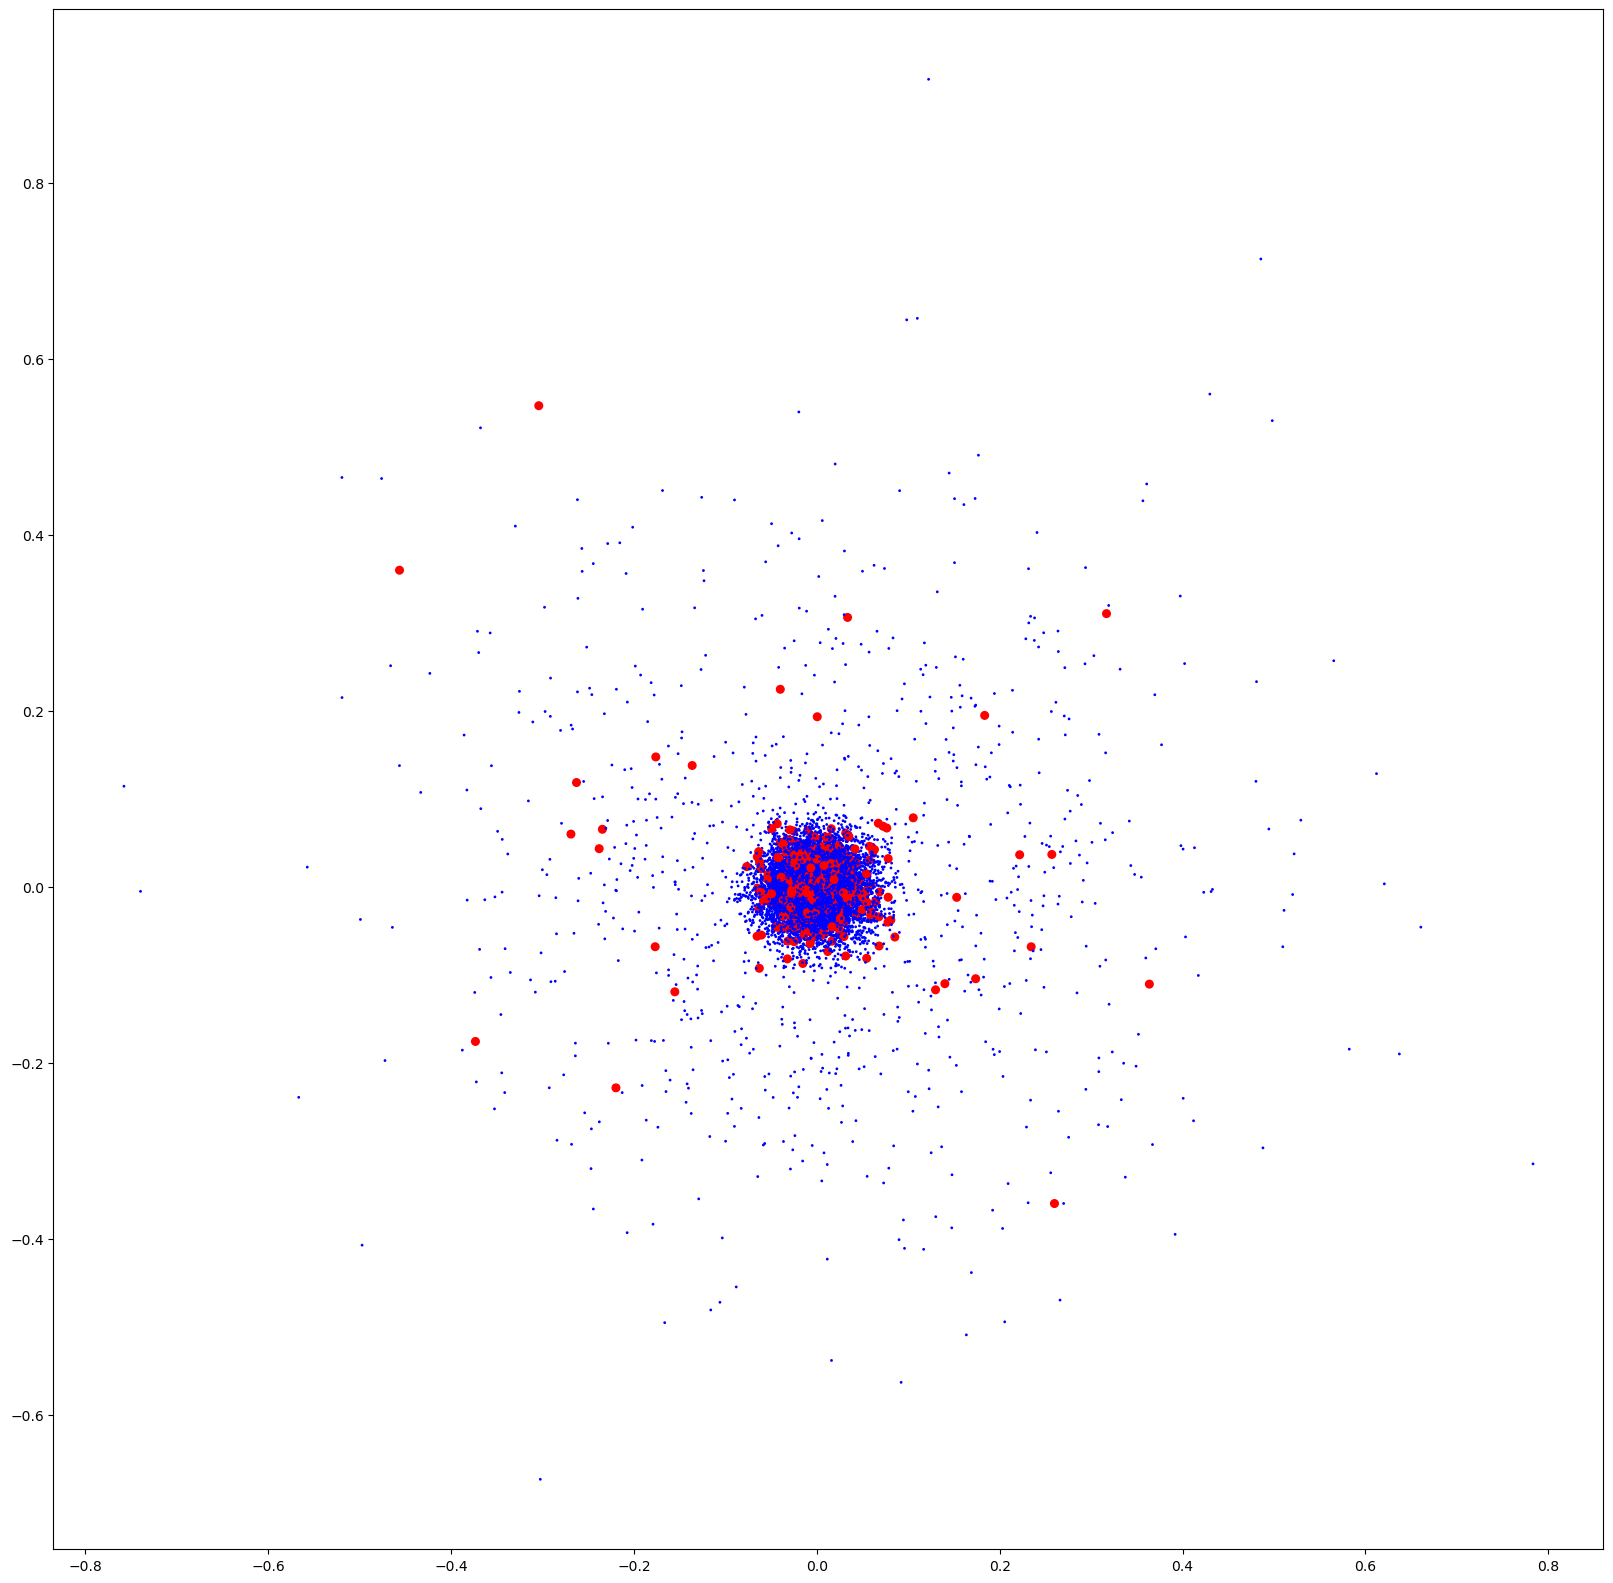

In [23]:
colors = ['b'] * num_products
s = [1] * num_products
for i, product in product_mapping["name_by_index"].items():
  if i < len(colors) and i < len(s):  # Add this condition to check if the index is within the range of the lists
    if "Chocolate" in product:
      colors[i] = 'r'
      s[i] = 30

X2 = PCA(n_components=2).fit_transform(embs_arr)
plt.figure(figsize=(20, 20))

plt.scatter(X2[:,0], X2[:,1], c=colors, s=s)